In [2]:
import yfinance as yf
import pandas as pd

# List of solar companies
solar_companies =  ['FSLR', 'ENPH', 'SEDG', 'CSIQ', 'RUN', 'JKS', 'NEE', 'TPIC', 'ORA', 'MAXN']

# Fetch ESG scores
esg_data = []
for ticker in solar_companies:
    try:
        stock = yf.Ticker(ticker)
        esg_scores = stock.sustainability
        if esg_scores is not None:
            esg_scores['Ticker'] = ticker
            esg_data.append(esg_scores)
        else:
            print(f"No ESG data available for {ticker}.")
    except Exception as e:
        print(f"Error fetching ESG data for {ticker}: {e}")

# Combine all ESG data
if esg_data:
    esg_df = pd.concat(esg_data, axis=0)
    esg_df.reset_index(inplace=True)
    print(esg_df.head())

    # Save ESG data to a CSV file
    esg_file = 'solar_companies_esg_data.csv'
    esg_df.to_csv(esg_file, index=False)
    print(f"ESG data saved to {esg_file}.")
else:
    print("No ESG data was fetched.")


              index esgScores Ticker
0            maxAge     86400   FSLR
1          totalEsg     17.31   FSLR
2  environmentScore      6.04   FSLR
3       socialScore      6.08   FSLR
4   governanceScore      5.19   FSLR
ESG data saved to solar_companies_esg_data.csv.


In [8]:
import pandas as pd

# Load the dataset
file_path = 'solar_companies_esg_data.csv'  # Adjust the file path if necessary
data = pd.read_csv(file_path)

# Rows to keep
rows_to_keep = [
    'maxAge', 'totalEsg', 'environmentScore', 'socialScore',
    'governanceScore', 'ratingYear', 'ratingMonth',
    'highestControversy', 'peerCount'
]

# Filter the dataset to include only the specified rows
filtered_data = data[data['index'].isin(rows_to_keep)]

# Save the cleaned dataset
output_file_path = 'filtered_solar_companies_esg_data.csv'
filtered_data.to_csv(output_file_path, index=False)
print(f"Filtered ESG data saved to {output_file_path}.")



Filtered ESG data saved to filtered_solar_companies_esg_data.csv.


In [9]:
import sqlite3
import pandas as pd

# Load the filtered ESG data
file_path = 'filtered_solar_companies_esg_data.csv'
esg_data = pd.read_csv(file_path)

# Connect to the SQLite database
db_path = 'financial_data.db'  # Replace with the actual database path
conn = sqlite3.connect(db_path)

# Save the ESG data as a new table in the database
table_name = 'solar_companies_esg_data'
esg_data.to_sql(table_name, conn, if_exists='replace', index=False)

print(f"Table '{table_name}' has been successfully added to the database.")

# Close the database connection
conn.close()


Table 'solar_companies_esg_data' has been successfully added to the database.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load ESG Data
esg_file = "filtered_solar_companies_esg_data.csv"
esg_data = pd.read_csv(esg_file)

In [11]:
# Step 2: Connect to the SQLite Database
db_path = "financial_data.db"  # Update path if needed
conn = sqlite3.connect(db_path)

In [12]:

# Step 3: Fetch Stock Performance Data
query = """
    SELECT Date, Asset AS Ticker, Close
    FROM solar_data
"""
stock_data = pd.read_sql(query, conn)

# Calculate daily returns
stock_data['Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

In [13]:
# Step 4: Merge ESG Data with Stock Data
esg_stock_data = pd.merge(esg_data, stock_data, on='Ticker', how='inner')

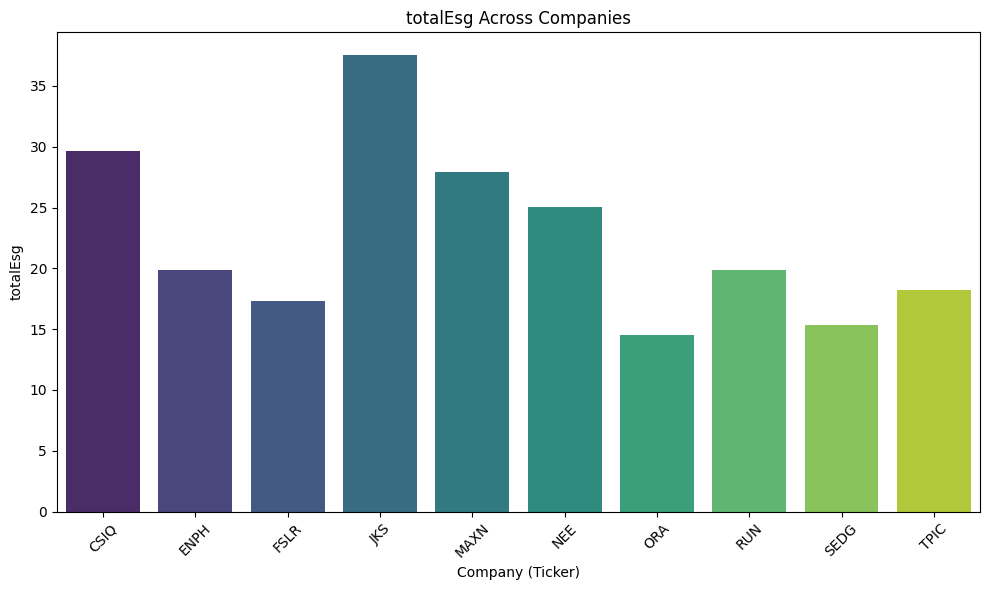

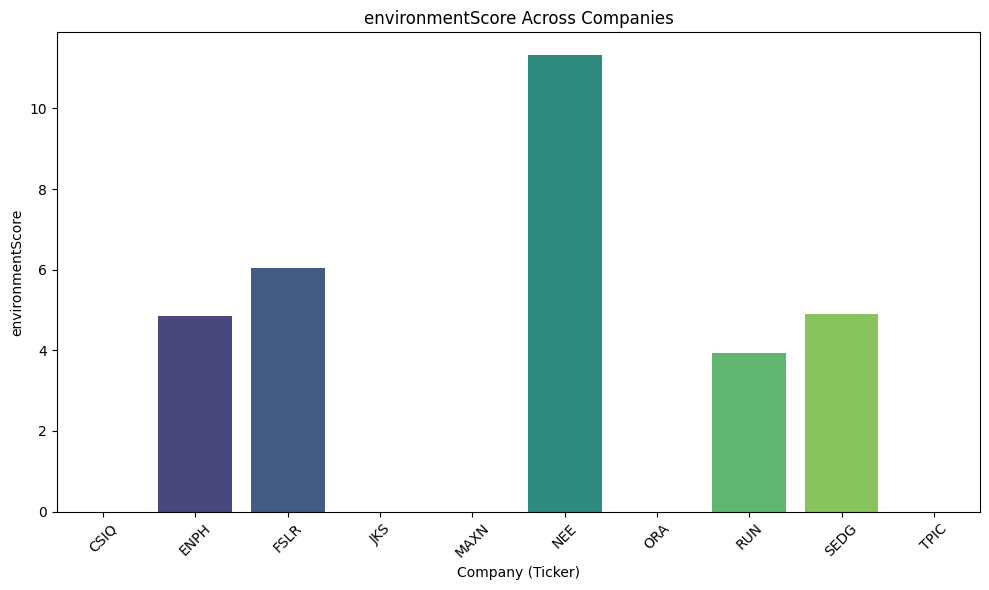

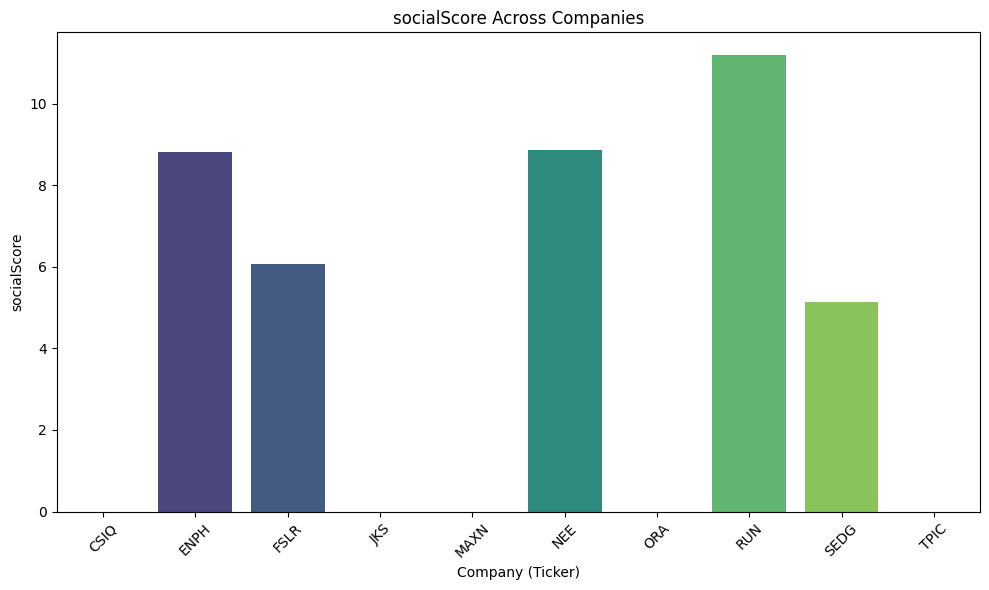

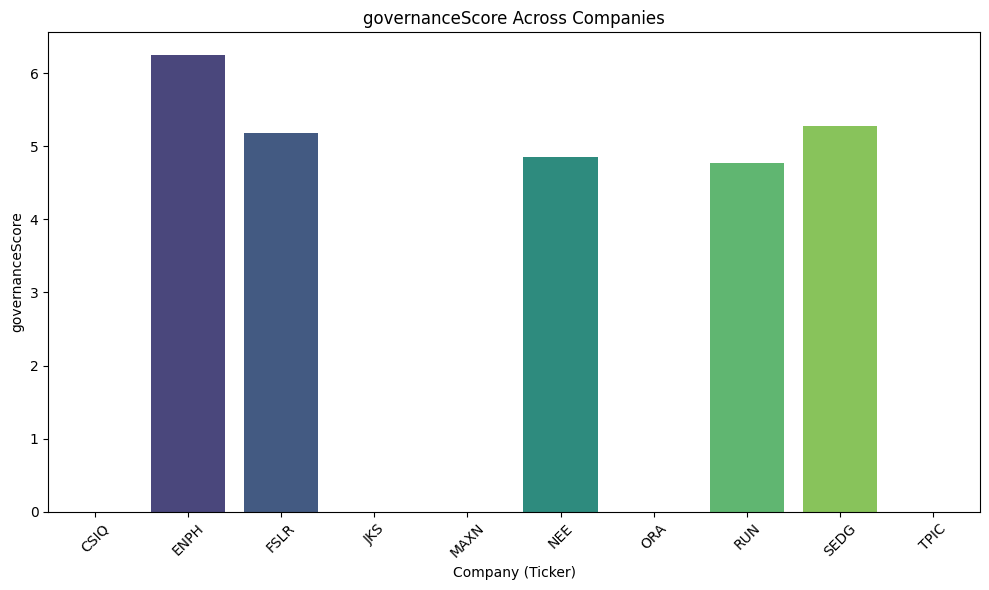

In [18]:
# Step 5: Compare ESG Scores Across Companies with Custom Color Palette
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure proper mapping of ESG metrics for each company
esg_scores = ['totalEsg', 'environmentScore', 'socialScore', 'governanceScore']
for score in esg_scores:
    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=esg_pivot.reset_index(),
        x='Ticker',
        y=score,
        hue='Ticker',  # Add hue to match the Ticker and color palette
        dodge=False,   # Avoid split bars for each hue category
        palette='viridis'
    )
    plt.title(f'{score} Across Companies')
    plt.ylabel(score)
    plt.xlabel('Company (Ticker)')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Remove redundant legends
    plt.tight_layout()
    plt.show()




In [24]:
import sqlite3
import pandas as pd

# Step 1: Connect to the SQLite database
db_path = 'financial_data.db'  # Path to your database
conn = sqlite3.connect(db_path)

# Step 2: Load ESG data
query_esg = "SELECT * FROM solar_companies_esg_data"
esg_data = pd.read_sql(query_esg, conn)

# Step 3: Pivot ESG data for analysis
esg_pivot = esg_data.pivot(index='Ticker', columns='index', values='esgScores').reset_index()
esg_pivot.rename(columns={
    'totalEsg': 'Total ESG',
    'environmentScore': 'Environment Score',
    'socialScore': 'Social Score',
    'governanceScore': 'Governance Score'
}, inplace=True)

# Step 4: Load stock performance data
query_stock = "SELECT Asset, AVG(Close) as Avg_Close, MAX(Close) as Max_Close, MIN(Close) as Min_Close FROM solar_data GROUP BY Asset"
stock_data = pd.read_sql(query_stock, conn)

# Rename Asset to Ticker for consistency
stock_data.rename(columns={'Asset': 'Ticker'}, inplace=True)

# Step 5: Merge ESG and stock performance data
merged_data = pd.merge(esg_pivot, stock_data, on='Ticker')

# Step 6: Calculate correlations
esg_scores = ['Total ESG', 'Environment Score', 'Social Score', 'Governance Score']
correlation_results = {}
for score in esg_scores:
    correlation = merged_data[[score, 'Avg_Close']].corr().iloc[0, 1]
    correlation_results[score] = correlation
    print(f"Correlation between {score} and Average Stock Close Price: {correlation:.2f}")

# Optional: Save merged data for future use
merged_data.to_csv("esg_stock_analysis.csv", index=False)
print("ESG and stock performance analysis saved as esg_stock_analysis.csv.")

# Close the database connection
conn.close()





Correlation between Total ESG and Average Stock Close Price: 0.22
Correlation between Environment Score and Average Stock Close Price: -0.15
Correlation between Social Score and Average Stock Close Price: -0.95
Correlation between Governance Score and Average Stock Close Price: 0.44
ESG and stock performance analysis saved as esg_stock_analysis.csv.


Correlation between totalEsg and Average Stock Close Price: 0.22
Correlation between environmentScore and Average Stock Close Price: -0.15
Correlation between socialScore and Average Stock Close Price: -0.95
Correlation between governanceScore and Average Stock Close Price: 0.44
ESG and stock performance analysis saved as esg_stock_analysis.csv.


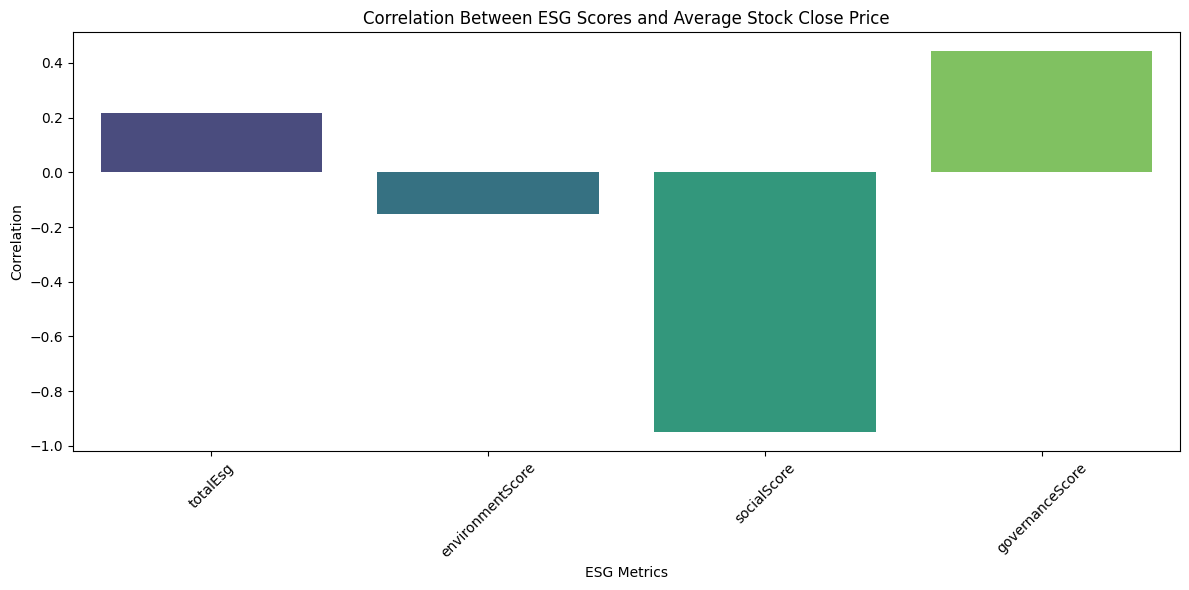

In [26]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
db_path = 'financial_data.db'
conn = sqlite3.connect(db_path)

# Fetch ESG data
query_esg = """
    SELECT *
    FROM solar_companies_esg_data
"""
esg_data = pd.read_sql(query_esg, conn)

# Fetch stock performance data
query_stock = """
    SELECT Asset, AVG(Close) as Avg_Close
    FROM solar_data
    GROUP BY Asset
"""
stock_performance_data = pd.read_sql(query_stock, conn)

# Match ESG 'Ticker' with stock 'Asset'
esg_data.rename(columns={'Ticker': 'Asset'}, inplace=True)

# Pivot ESG data for easier processing
esg_pivot = esg_data.pivot(index='Asset', columns='index', values='esgScores').reset_index()

# Merge ESG and stock performance data
merged_data = pd.merge(esg_pivot, stock_performance_data, on='Asset')

# Define ESG scores for correlation analysis
esg_scores = ['totalEsg', 'environmentScore', 'socialScore', 'governanceScore']

# Calculate correlations and save results
correlation_results = {}
for score in esg_scores:
    correlation = merged_data[[score, 'Avg_Close']].corr().iloc[0, 1]
    correlation_results[score] = correlation
    print(f"Correlation between {score} and Average Stock Close Price: {correlation:.2f}")

# Save results to a CSV file
correlation_df = pd.DataFrame.from_dict(correlation_results, orient='index', columns=['Correlation'])
correlation_df.to_csv('esg_stock_analysis.csv')
print("ESG and stock performance analysis saved as esg_stock_analysis.csv.")

# Plot correlations for visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_df.index, y='Correlation', data=correlation_df, palette='viridis', hue=correlation_df.index, dodge=False)
plt.title('Correlation Between ESG Scores and Average Stock Close Price')
plt.xlabel('ESG Metrics')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Removes the legend if unnecessary
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


Pivoted ESG Data (with missing values handled):
index Ticker  Environment Score  Governance Score  highestControversy  \
0       CSIQ              6.204             5.268                 3.0   
1       ENPH              4.840             6.250                 1.0   
2       FSLR              6.040             5.190                 2.0   
3        JKS              6.204             5.268                 2.0   
4       MAXN              6.204             5.268                 1.0   
5        NEE             11.320             4.850                 2.0   
6        ORA              6.204             5.268                 1.0   
7        RUN              3.930             4.770                 2.0   
8       SEDG              4.890             5.280                 2.0   
9       TPIC              6.204             5.268                 0.0   

index   maxAge  peerCount  ratingMonth  ratingYear  Social Score  Total ESG  
0      86400.0      120.0          1.0      2025.0          8.02      

<Figure size 1000x600 with 0 Axes>

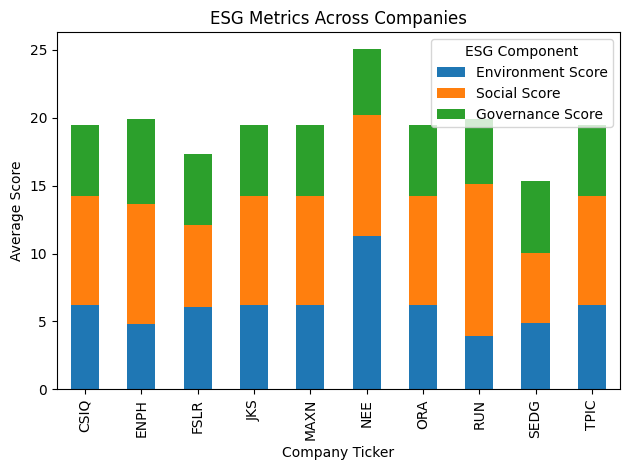

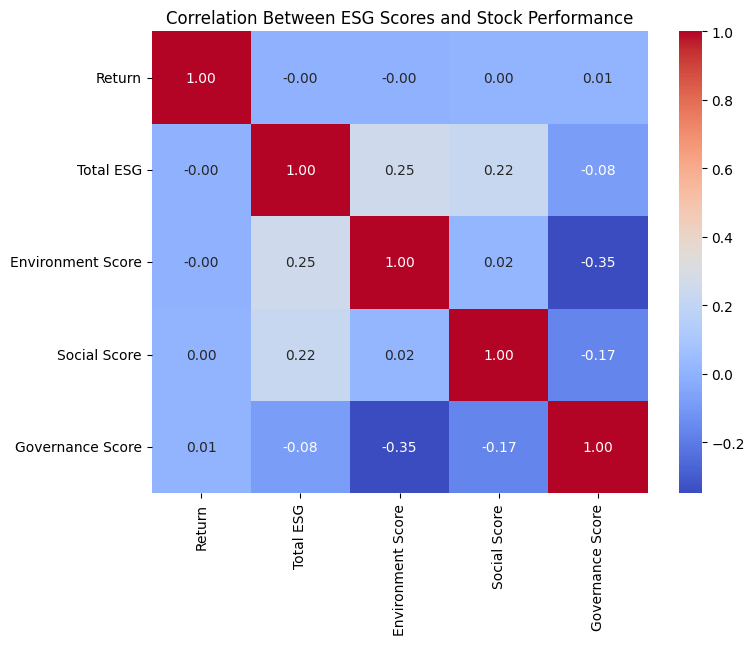

In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to the SQLite database
db_path = '/content/financial_data.db'  # Path to the SQLite database
conn = sqlite3.connect(db_path)

# Step 2: Load ESG data from the database
esg_query = """
SELECT * FROM solar_companies_esg_data
"""
esg_data = pd.read_sql(esg_query, conn)

# Step 3: Pivot ESG data for better organization
esg_pivot = esg_data.pivot(index='Ticker', columns='index', values='esgScores').reset_index()

# Rename columns for clarity
esg_pivot.rename(columns={
    'totalEsg': 'Total ESG',
    'environmentScore': 'Environment Score',
    'socialScore': 'Social Score',
    'governanceScore': 'Governance Score'
}, inplace=True)

# Handle missing values by imputing with the mean for numeric columns
numeric_cols = esg_pivot.select_dtypes(include=['float64', 'int64']).columns
esg_pivot[numeric_cols] = esg_pivot[numeric_cols].fillna(esg_pivot[numeric_cols].mean())

print("Pivoted ESG Data (with missing values handled):")
print(esg_pivot)

# Step 4: Fetch stock performance data
stock_query = """
SELECT Date, Asset, Close FROM solar_data
"""
stock_data = pd.read_sql(stock_query, conn)

# Step 5: Calculate daily returns for stock data
stock_data['Return'] = stock_data.groupby('Asset')['Close'].pct_change()

# Merge ESG data with stock performance
merged_data = pd.merge(stock_data, esg_pivot, left_on='Asset', right_on='Ticker')

# Step 6: Correlation analysis between ESG scores and stock performance
correlation_matrix = merged_data[['Return', 'Total ESG', 'Environment Score', 'Social Score', 'Governance Score']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 7: Visualize ESG metrics
plt.figure(figsize=(10, 6))
esg_pivot.set_index('Ticker')[['Environment Score', 'Social Score', 'Governance Score']].plot(kind='bar', stacked=True)
plt.title('ESG Metrics Across Companies')
plt.ylabel('Average Score')
plt.xlabel('Company Ticker')
plt.legend(title='ESG Component')
plt.tight_layout()
plt.show()

# Step 8: Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between ESG Scores and Stock Performance')
plt.show()

# Close the database connection
conn.close()




Interpretation of the Results
Pivoted ESG Data:
The pivoted ESG data shows company-level ESG metrics after handling missing values. Key points include:

Missing Value Handling: Missing ESG metrics were imputed with the mean of the respective columns. This provides a complete dataset for analysis.
Company Insights:
Highest Controversy: Indicates the controversy level faced by companies. For instance, CSIQ has a controversy level of 3, the highest among all companies.
ESG Scores:
Companies like NEE and RUN show distinct values in their ESG components, suggesting unique sustainability practices.
Correlation Matrix:
The correlation matrix illustrates relationships between ESG scores and stock returns:

Return vs. ESG Metrics:
Weak correlations (near zero) suggest that ESG scores may not directly influence stock returns.
Governance Score shows a slightly positive correlation (0.007), while Social Score and Environment Score have negligible relationships.
Internal ESG Metric Correlations:
Environment Score and Governance Score: A negative correlation (-0.35), indicating a possible trade-off between these metrics for some companies.
Social Score and Total ESG: Moderate positive correlation (0.22), implying that social initiatives contribute significantly to the total ESG score.

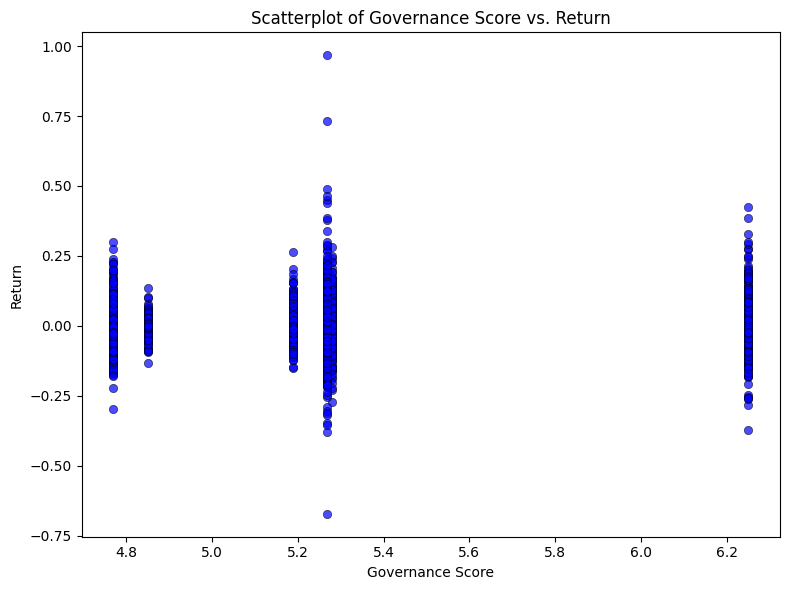

In [35]:
# Step 9: Scatterplots for significant correlations
significant_correlations = {
    'Governance Score': 'Return'  # Replace or add other significant pairs as needed
}

for x, y in significant_correlations.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=merged_data, x=x, y=y, alpha=0.7, color='blue', edgecolor='k')
    plt.title(f'Scatterplot of {x} vs. {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()


Correlation Matrix:
                     Return  Total ESG  Environment Score  Social Score  \
Return             1.000000  -0.002073          -0.003488      0.003931   
Total ESG         -0.002073   1.000000           0.254417      0.219782   
Environment Score -0.003488   0.254417           1.000000      0.017903   
Social Score       0.003931   0.219782           0.017903      1.000000   
Governance Score   0.007100  -0.081775          -0.349959     -0.169337   

                   Governance Score  
Return                     0.007100  
Total ESG                 -0.081775  
Environment Score         -0.349959  
Social Score              -0.169337  
Governance Score           1.000000  


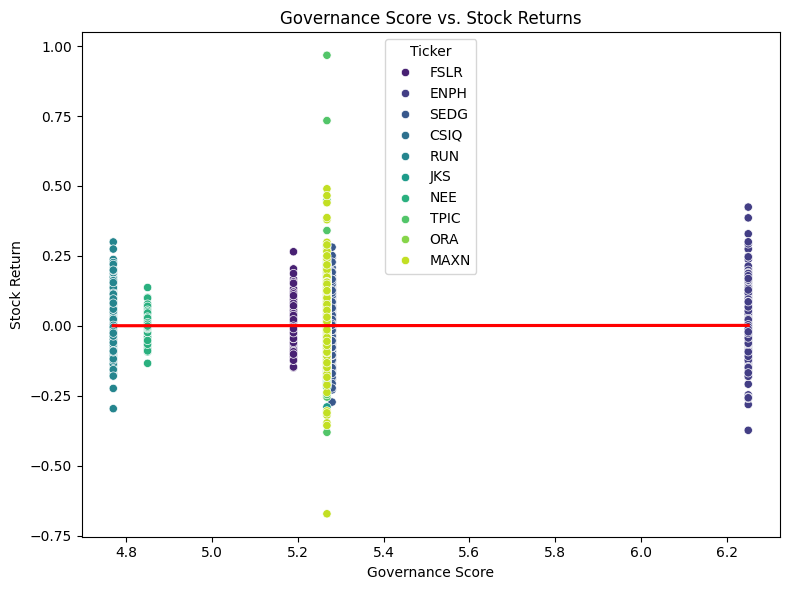

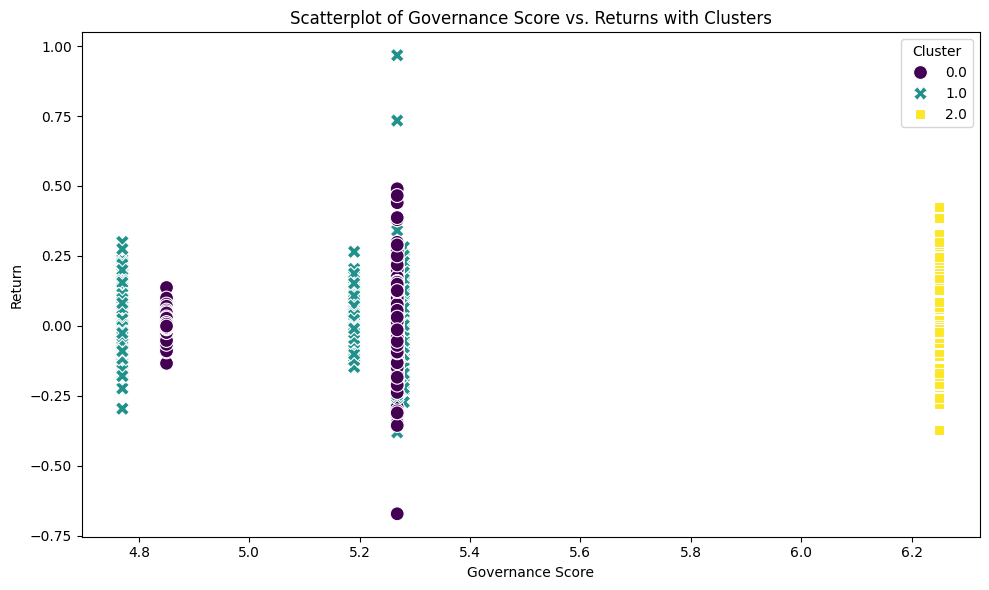

Updated dataset with clusters saved to 'updated_merged_data_with_clusters.csv'.


In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Connect to the SQLite database
db_path = '/content/financial_data.db'  # Path to the SQLite database
conn = sqlite3.connect(db_path)

# Step 2: Load ESG data from the database
esg_query = "SELECT * FROM solar_companies_esg_data"
esg_data = pd.read_sql(esg_query, conn)

# Step 3: Pivot ESG data for better organization
esg_pivot = esg_data.pivot(index='Ticker', columns='index', values='esgScores').reset_index()
esg_pivot.rename(columns={
    'totalEsg': 'Total ESG',
    'environmentScore': 'Environment Score',
    'socialScore': 'Social Score',
    'governanceScore': 'Governance Score'
}, inplace=True)

# Convert numeric columns and handle missing values
numeric_columns = ['Environment Score', 'Governance Score', 'Social Score', 'Total ESG']
for col in numeric_columns:
    esg_pivot[col] = pd.to_numeric(esg_pivot[col], errors='coerce')

# Fill NaN values only in the numeric columns
esg_pivot[numeric_columns] = esg_pivot[numeric_columns].fillna(esg_pivot[numeric_columns].mean())

# Step 4: Fetch stock performance data
stock_query = "SELECT Date, Asset AS Ticker, Close FROM solar_data"
stock_data = pd.read_sql(stock_query, conn)

# Step 5: Calculate daily returns for stock data
stock_data['Return'] = stock_data.groupby('Ticker')['Close'].pct_change()

# Merge ESG data with stock performance
merged_data = pd.merge(stock_data, esg_pivot, on='Ticker', how='inner')

# Step 6: Correlation analysis between ESG scores and stock performance
correlation_matrix = merged_data[['Return', 'Total ESG', 'Environment Score', 'Social Score', 'Governance Score']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Step 7: Scatterplots and trend lines for significant correlations
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Governance Score', y='Return', hue='Ticker', palette='viridis')
sns.regplot(data=merged_data, x='Governance Score', y='Return', scatter=False, color='red')
plt.title('Governance Score vs. Stock Returns')
plt.xlabel('Governance Score')
plt.ylabel('Stock Return')
plt.tight_layout()
plt.show()

# Convert numeric columns and handle missing values
numeric_columns = ['Environment Score', 'Governance Score', 'Social Score', 'Total ESG']
for col in numeric_columns:
    esg_pivot[col] = pd.to_numeric(esg_pivot[col], errors='coerce')

# Fill NaN values only in the numeric columns
esg_pivot[numeric_columns] = esg_pivot[numeric_columns].fillna(esg_pivot[numeric_columns].mean())

# Standardize the ESG and Returns data for clustering
features = ['Total ESG', 'Environment Score', 'Social Score', 'Governance Score', 'Return']
scaled_data = merged_data[features].dropna()  # Ensure no missing values for clustering
scaler = StandardScaler()
standardized_data = scaler.fit_transform(scaled_data)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data.loc[scaled_data.index, 'Cluster'] = kmeans.fit_predict(standardized_data)

# Step 8: Visualize scatterplot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x='Governance Score',
    y='Return',
    hue='Cluster',
    palette='viridis',
    style='Cluster',
    s=100
)
plt.title('Scatterplot of Governance Score vs. Returns with Clusters')
plt.xlabel('Governance Score')
plt.ylabel('Return')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

# Optional: Save the updated merged data for further analysis
merged_data.to_csv("updated_merged_data_with_clusters.csv", index=False)
print("Updated dataset with clusters saved to 'updated_merged_data_with_clusters.csv'.")


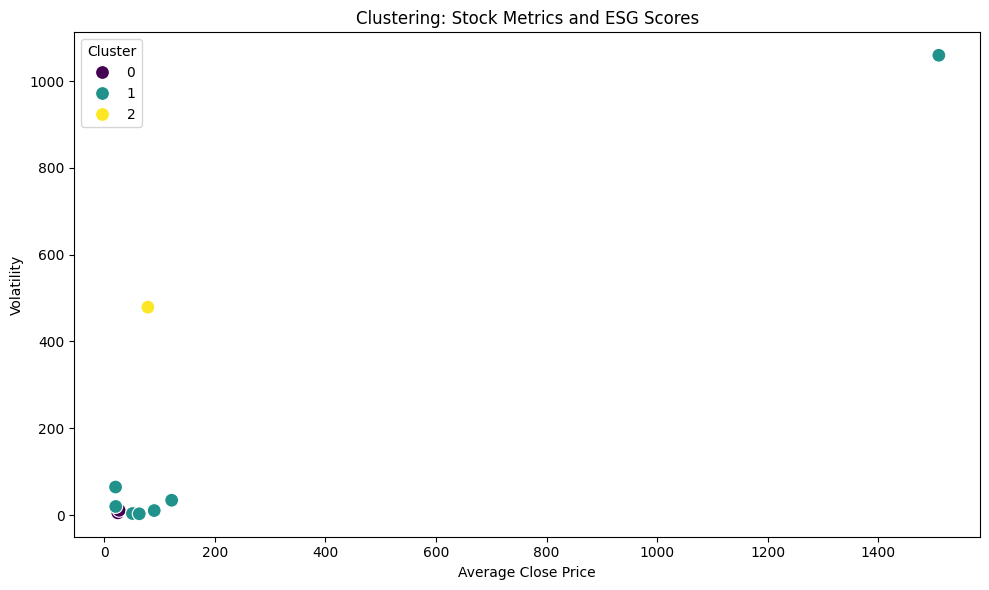

In [48]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Connect to SQLite database
db_path = '/content/financial_data.db'  # Replace with actual path
conn = sqlite3.connect(db_path)

# Step 2: Load ESG data
esg_query = "SELECT * FROM solar_companies_esg_data"
esg_data = pd.read_sql(esg_query, conn)

# Step 3: Pivot ESG data for better organization
esg_pivot = esg_data.pivot(index='Ticker', columns='index', values='esgScores').reset_index()
esg_pivot.rename(columns={
    'totalEsg': 'Total ESG',
    'environmentScore': 'Environment Score',
    'socialScore': 'Social Score',
    'governanceScore': 'Governance Score'
}, inplace=True)

# Step 4: Handle missing values
numeric_columns = esg_pivot.select_dtypes(include=['float64', 'int64']).columns
esg_pivot[numeric_columns] = esg_pivot[numeric_columns].fillna(esg_pivot[numeric_columns].mean())

# Step 5: Load stock performance data
stock_query = """
    SELECT Asset, AVG(Close) AS Avg_Close,
    (MAX(Close) - MIN(Close)) / MIN(Close) AS Volatility
    FROM solar_data GROUP BY Asset
"""
stock_data = pd.read_sql(stock_query, conn)

# Step 6: Merge ESG data with stock performance data
merged_data = pd.merge(esg_pivot, stock_data, left_on='Ticker', right_on='Asset', how='inner')

# Step 7: Clustering
scaler = StandardScaler()
features = ['Total ESG', 'Environment Score', 'Social Score', 'Governance Score', 'Avg_Close', 'Volatility']
standardized_data = scaler.fit_transform(merged_data[features])

kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(standardized_data)

# Step 8: Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data, x='Avg_Close', y='Volatility', hue='Cluster', palette='viridis', s=100
)
plt.title('Clustering: Stock Metrics and ESG Scores')
plt.xlabel('Average Close Price')
plt.ylabel('Volatility')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Close database connection
conn.close()




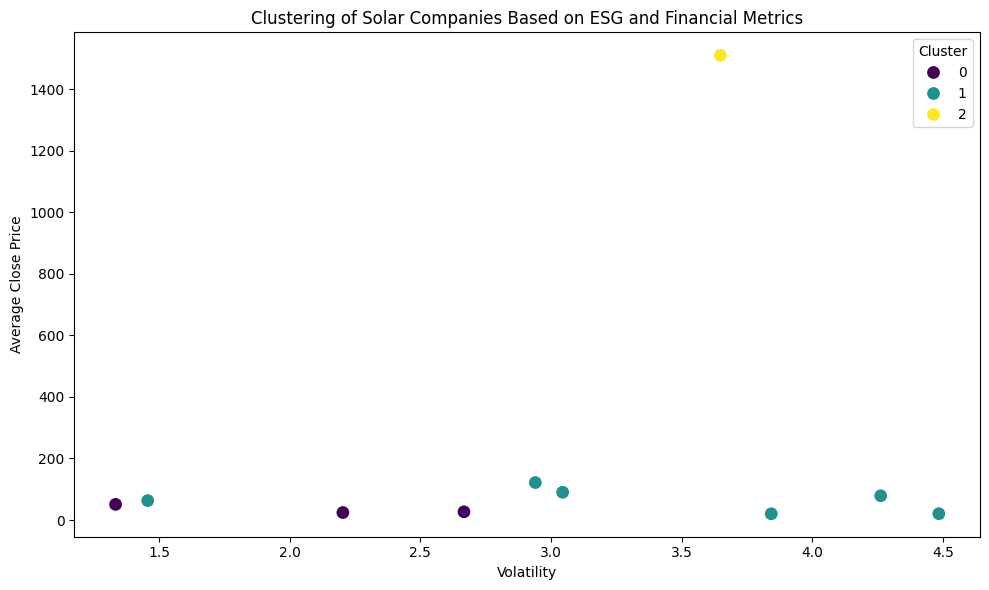

Cluster 0 Analysis:
  Ticker  Total ESG  Avg_Close  Volatility
0   CSIQ      29.63  24.281591    2.203315
3    JKS      37.53  26.651894    2.666968
5    NEE      25.05  50.739901    1.333163


Cluster 1 Analysis:
  Ticker  Total ESG   Avg_Close  Volatility
1   ENPH      19.90   78.666843    4.262279
2   FSLR      17.31   90.120366    3.044595
6    ORA      14.50   63.024540    1.456204
7    RUN      19.89   20.484896    4.484768
8   SEDG      15.31  121.722224    2.940014
9   TPIC      18.20   20.175215    3.843329


Cluster 2 Analysis:
  Ticker  Total ESG    Avg_Close  Volatility
4   MAXN      27.91  1509.877133    3.648509




In [54]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Connect to SQLite database
db_path = '/content/financial_data.db'
conn = sqlite3.connect(db_path)

# Step 2: Load and prepare ESG data
esg_query = "SELECT * FROM solar_companies_esg_data"
esg_data = pd.read_sql(esg_query, conn)

# Pivot ESG data for better organization
esg_pivot = esg_data.pivot(index='Ticker', columns='index', values='esgScores').reset_index()

# Rename columns for clarity
esg_pivot.rename(columns={
    'totalEsg': 'Total ESG',
    'environmentScore': 'Environment Score',
    'socialScore': 'Social Score',
    'governanceScore': 'Governance Score'
}, inplace=True)

# Fill missing values with mean (only for numeric columns)
numeric_columns = esg_pivot.select_dtypes(include=['float64', 'int64']).columns
esg_pivot[numeric_columns] = esg_pivot[numeric_columns].fillna(esg_pivot[numeric_columns].mean())

# Step 3: Load stock performance data and calculate volatility
stock_query = """
    SELECT Asset AS Ticker, AVG(Close) AS Avg_Close,
           (MAX(Close) - MIN(Close)) / AVG(Close) AS Volatility
    FROM solar_data
    GROUP BY Asset
"""
stock_data = pd.read_sql(stock_query, conn)

# Step 4: Merge ESG and stock performance data
merged_data = pd.merge(esg_pivot, stock_data, on='Ticker')

# Step 5: Standardize features for clustering
features = merged_data[['Volatility', 'Total ESG', 'Avg_Close']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 6: Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 7: Visualize clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Volatility', y='Avg_Close', hue='Cluster', palette='viridis', s=100)
plt.title('Clustering of Solar Companies Based on ESG and Financial Metrics')
plt.xlabel('Volatility')
plt.ylabel('Average Close Price')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Step 8: Analyze and plot clusters
for cluster in merged_data['Cluster'].unique():
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    print(f"Cluster {cluster} Analysis:")
    print(cluster_data[['Ticker', 'Total ESG', 'Avg_Close', 'Volatility']])
    print("\n")

# Close the database connection
conn.close()





Interpretation:
Cluster 0 (Low Performance, Moderate ESG):

Companies with moderate "Total ESG" scores (e.g., CSIQ, JKS, NEE).
Relatively low average close prices, indicating underperformance in terms of financial returns.
Low volatility, suggesting a stable but unremarkable financial performance.
Cluster 1 (Mixed Performance and ESG):

Includes both high-performing companies like SEDG and low-performing ones like RUN.
Moderate ESG scores with varying financial volatility.
This cluster shows diversity, highlighting companies needing further investigation into specific factors contributing to financial or ESG performance.
Cluster 2 (Outlier - MAXN):

MAXN stands out with exceptionally high average close prices, moderate volatility, and relatively high ESG scores.
This outlier may need a deeper examination to understand its unique market position.